In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset_train=pd.read_csv("KDDTrain+_20Percent.txt")
display(dataset_train)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20


In [3]:
# The CSV file has no column heads, so add them
columns = ['duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'attack',
    'level'
    
]
dataset_train.columns = columns
display(dataset_train)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19
25187,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12
25188,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
25189,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20


In [4]:
dataset_test=pd.read_csv("KDDTest+.txt")
dataset_test.columns=columns
display(dataset_test)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [5]:
df=pd.concat([dataset_train,dataset_train], ignore_index = True)
display(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19
50378,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12
50379,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
50380,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50382 entries, 0 to 50381
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50382 non-null  int64  
 1   protocol_type                50382 non-null  object 
 2   service                      50382 non-null  object 
 3   flag                         50382 non-null  object 
 4   src_bytes                    50382 non-null  int64  
 5   dst_bytes                    50382 non-null  int64  
 6   land                         50382 non-null  int64  
 7   wrong_fragment               50382 non-null  int64  
 8   urgent                       50382 non-null  int64  
 9   hot                          50382 non-null  int64  
 10  num_failed_logins            50382 non-null  int64  
 11  logged_in                    50382 non-null  int64  
 12  num_compromised              50382 non-null  int64  
 13  root_shell      

In [7]:
print("Shape :",df.shape)
# Statistical description of training data set
print(df.describe())

Shape : (50382, 43)
           duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  50382.000000  5.038200e+04  5.038200e+04  50382.000000    50382.000000   
mean     305.066214  2.433157e+04  3.491986e+03      0.000079        0.023739   
std     2686.581615  2.410829e+06  8.883160e+04      0.008910        0.260223   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.307500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  50382.00000  50382.000000       50382.000000  50382.000000   
mean       0.00004      0.198047           0.001191      0.394784   
std        0.00630      2.154223           

In [8]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
df.nunique()

duration                        758
protocol_type                     3
service                          66
flag                             11
src_bytes                      1665
dst_bytes                      3922
land                              2
wrong_fragment                    3
urgent                            2
hot                              22
num_failed_logins                 5
logged_in                         2
num_compromised                  28
root_shell                        2
su_attempted                      3
num_root                         28
num_file_creations               20
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           466
srv_count                       414
serror_rate                      70
srv_serror_rate                  56
rerror_rate                      72
srv_rerror_rate             

In [10]:
df[[c for c in df.columns if c not in df.describe().columns]].astype('category').describe()

,protocol_type,service,flag,attack
count,50382,50382,50382,50382
unique,3,66,11,22
top,tcp,http,SF,normal
freq,41050,16006,29944,26896


In [11]:
# map normal to No, all attacks to Yes
is_attack = df.attack.map(lambda a: 'NO' if a == 'normal' else 'Yes')
data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack

# view the result
df.head(30)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NO
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Yes
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NO
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,NO
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Yes
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Yes
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Yes
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Yes
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Yes
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Yes


In [12]:
df.tail(30)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
50352,0,udp,private,SF,105,147,0,0,0,0,...,0.03,0.01,0.00,0.00,0.00,0.00,0.0,normal,20,NO
50353,0,tcp,smtp,S0,0,0,0,0,0,0,...,0.03,0.01,0.01,0.97,0.24,0.00,0.0,neptune,17,Yes
50354,0,tcp,http,SF,276,622,0,0,0,0,...,0.00,0.00,0.01,0.00,0.00,0.00,0.0,normal,21,NO
50355,0,tcp,http,SF,2499,2737,0,0,0,0,...,0.00,0.03,0.05,0.00,0.00,0.00,0.0,normal,20,NO
50356,0,tcp,ctf,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.0,neptune,20,Yes
50357,0,tcp,http,SF,193,2408,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,normal,21,NO
50358,0,tcp,http,SF,252,6160,0,0,0,0,...,0.00,0.33,0.04,0.00,0.00,0.00,0.0,normal,21,NO
50359,0,udp,private,SF,105,146,0,0,0,0,...,0.02,0.01,0.00,0.00,0.00,0.00,0.0,normal,21,NO
50360,0,tcp,smtp,S0,0,0,0,0,0,0,...,0.03,0.02,0.01,0.97,0.15,0.00,0.0,neptune,12,Yes
50361,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.0,neptune,19,Yes


In [13]:
# lists to hold our attack classifications
attacks1 = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
attacks2 = ['ipsweep','mscan','nmap','portsweep','saint','satan']
attacks3 = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
attacks4 = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']
# for plotting later on
attack_labels = ['Normal','DoS','Probe','Privilege','Access']
# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in attacks1:
        # dos_attacks map to 1
        attack_type = 'dos attack'
    elif attack in attacks2:
        # probe_attacks map to 2
        attack_type = 'probe attack'
    elif attack in attacks3:
        # privilege escalation attacks map to 3
        attack_type = 'privilege attack'
    elif attack in attacks4:
        # remote access attacks map to 4
        attack_type = 'access attack'
    else:
        # normal maps to 0
        attack_type = 'Safe'
    return attack_type
# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map
# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,NO,Safe
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,Yes,dos attack
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,NO,Safe
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,NO,Safe
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,Yes,dos attack


In [14]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
50377,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.0,1.0,neptune,19,Yes,dos attack
50378,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.18,0.0,0.0,0.0,0.0,warezclient,12,Yes,access attack
50379,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21,Yes,dos attack
50380,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.00,0.00,1.0,1.0,0.0,0.0,neptune,20,Yes,dos attack
50381,0,tcp,finger,S0,0,0,0,0,0,0,...,0.01,0.00,1.0,1.0,0.0,0.0,neptune,18,Yes,dos attack


In [15]:
# use a crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,392,0
buffer_overflow,0,12,0
ftp_write,0,2,0
guess_passwd,0,20,0
imap,0,10,0
ipsweep,1218,202,0
land,0,2,0
loadmodule,0,2,0
multihop,0,4,0


In [16]:
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)

    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)

    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list):
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)

        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                          title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])

    return axs

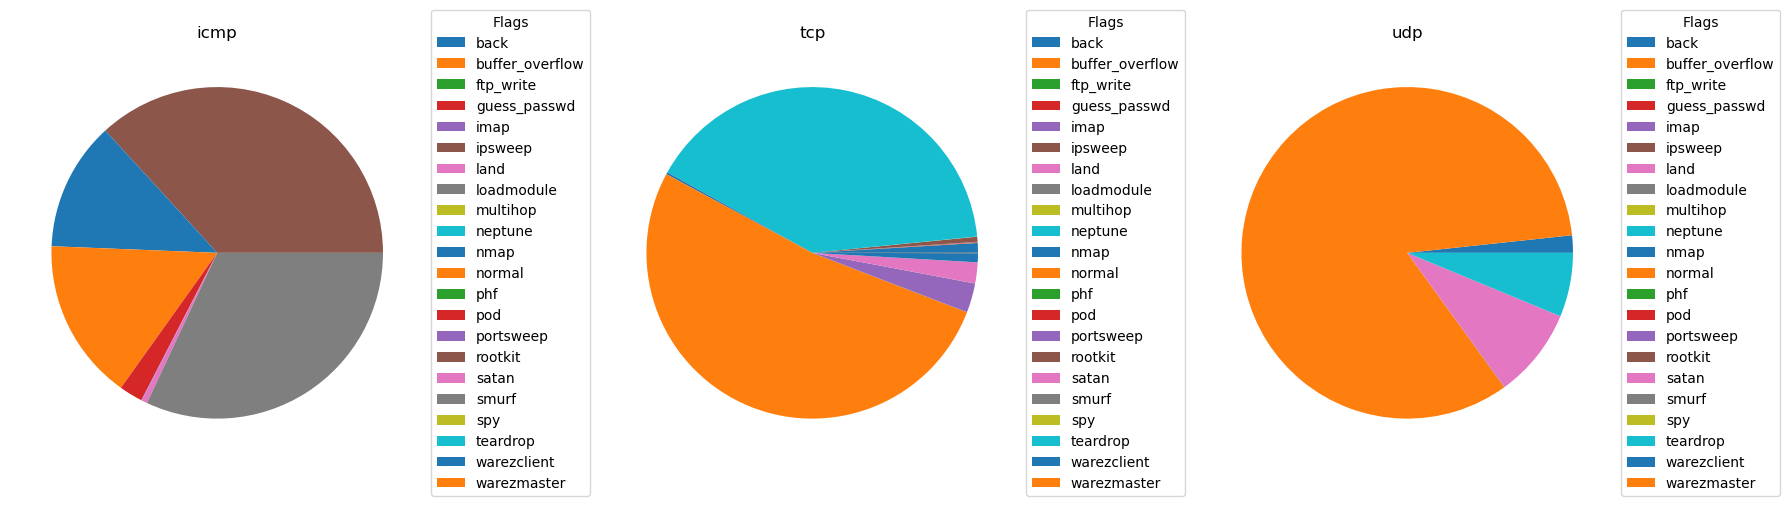

In [17]:
# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

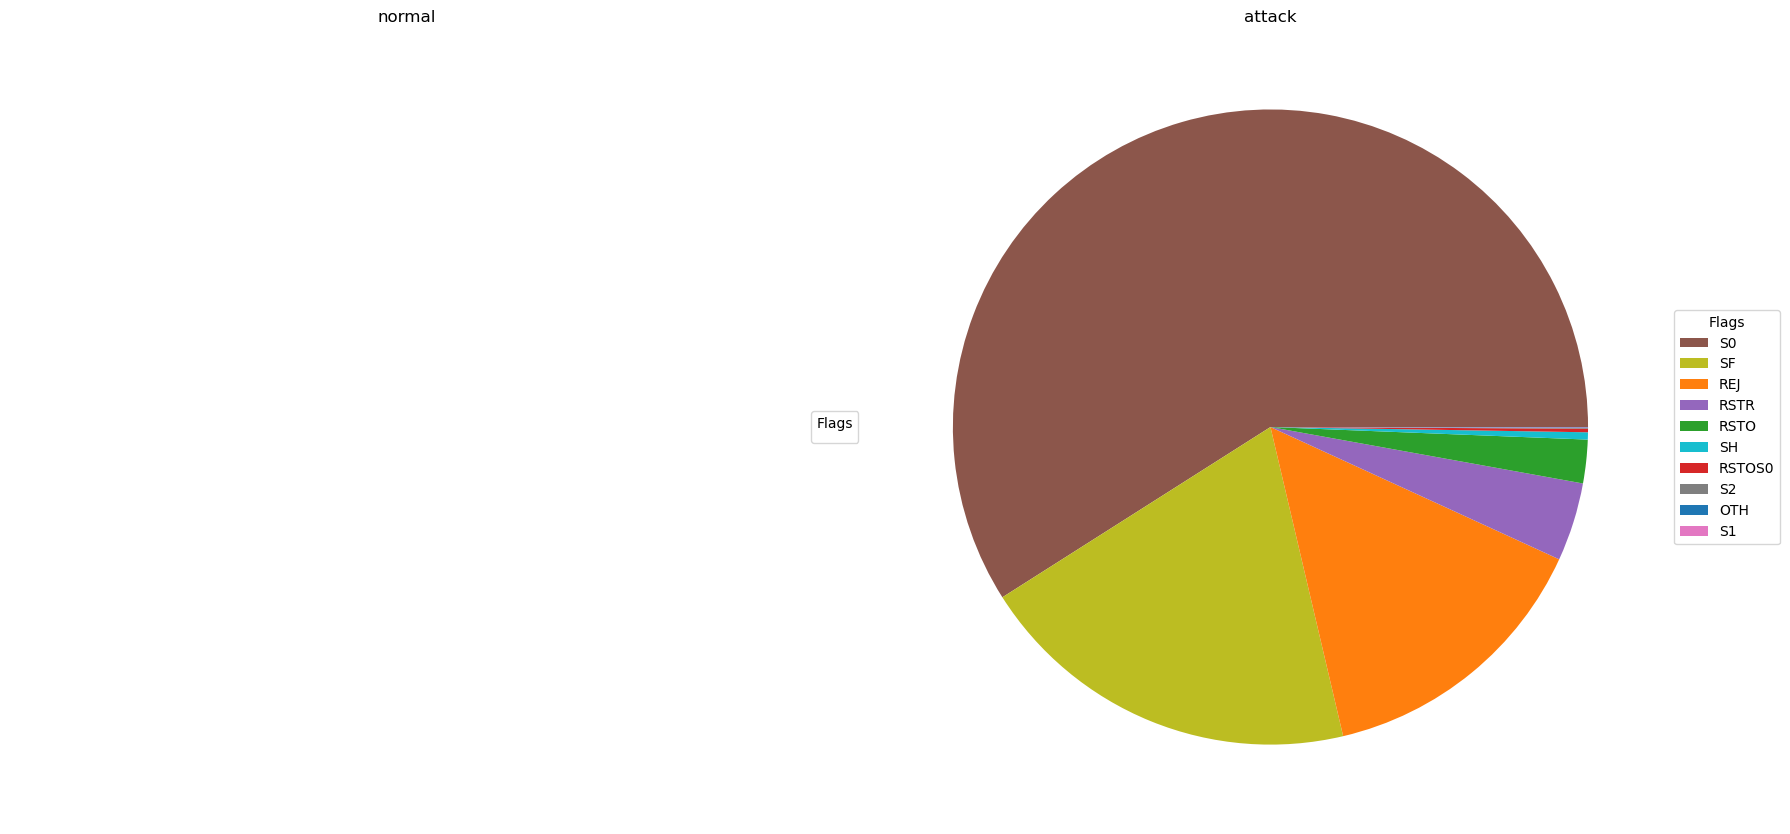

In [18]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 'No'].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 'Yes'].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])
plt.show()

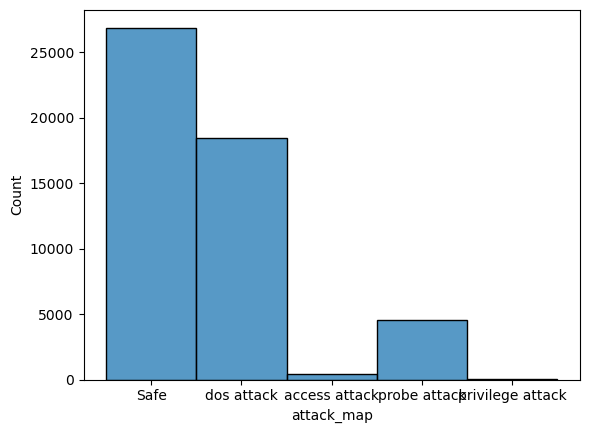

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
   
sns.histplot(x='attack_map', data=df, )
plt.show()

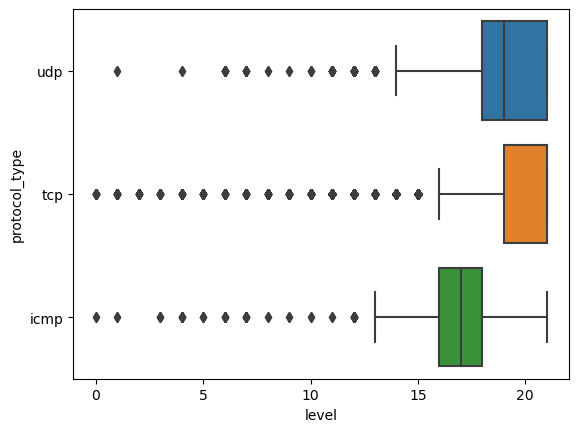

In [20]:
sns.boxplot(x="level",y='protocol_type',data=df)
plt.show()

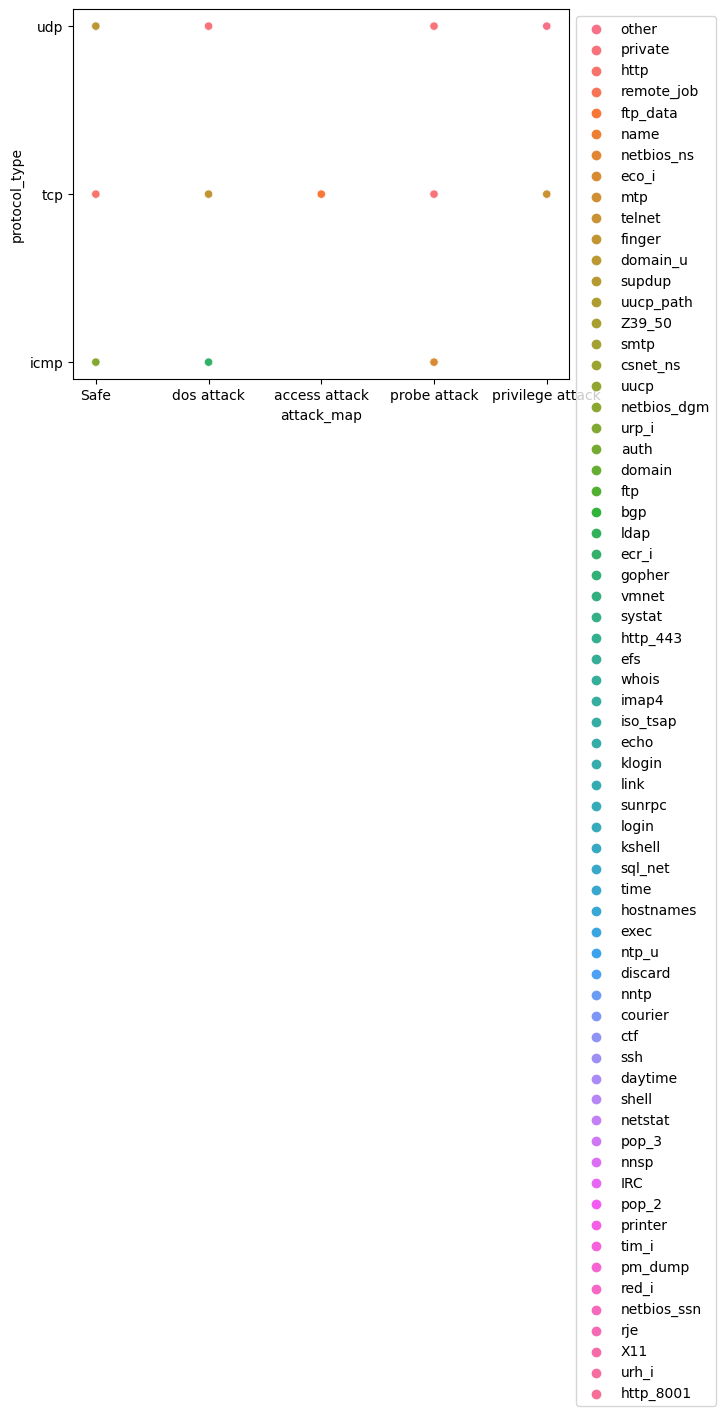

In [21]:
sns.scatterplot( x='attack_map', y='protocol_type', data=df,
                hue='service')
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

In [22]:
# create an instance of LabelEncoder
le = LabelEncoder()
# fit and transform the "Senior Management" 
# column with LabelEncoder
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])
df['protocol_type']=le.fit_transform(df['protocol_type'])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,2,41,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,NO,Safe
1,0,1,46,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,Yes,dos attack
2,0,1,22,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,NO,Safe
3,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,NO,Safe
4,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,Yes,dos attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0,1,16,2,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,19,Yes,dos attack
50378,0,1,19,9,334,0,0,0,0,0,...,1.00,0.18,0.00,0.00,0.0,0.00,warezclient,12,Yes,access attack
50379,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,Yes,dos attack
50380,0,1,38,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,20,Yes,dos attack


In [23]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [24]:
df = swap_columns(df, 'attack_flag', 'attack')
display(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_flag,level,attack,attack_map
0,0,2,41,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,NO,15,normal,Safe
1,0,1,46,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,Yes,19,neptune,dos attack
2,0,1,22,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,NO,21,normal,Safe
3,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,NO,21,normal,Safe
4,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,21,neptune,dos attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0,1,16,2,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,19,neptune,dos attack
50378,0,1,19,9,334,0,0,0,0,0,...,1.00,0.18,0.00,0.00,0.0,0.00,Yes,12,warezclient,access attack
50379,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,21,neptune,dos attack
50380,0,1,38,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,Yes,20,neptune,dos attack


In [25]:
df = swap_columns(df, 'attack', 'level')
display(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_flag,attack,level,attack_map
0,0,2,41,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,NO,normal,15,Safe
1,0,1,46,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,Yes,neptune,19,dos attack
2,0,1,22,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,NO,normal,21,Safe
3,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,NO,normal,21,Safe
4,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,neptune,21,dos attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0,1,16,2,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,neptune,19,dos attack
50378,0,1,19,9,334,0,0,0,0,0,...,1.00,0.18,0.00,0.00,0.0,0.00,Yes,warezclient,12,access attack
50379,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,neptune,21,dos attack
50380,0,1,38,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,Yes,neptune,20,dos attack


In [26]:
df = swap_columns(df, 'attack_map', 'level')
display(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_flag,attack,attack_map,level
0,0,2,41,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,NO,normal,Safe,15
1,0,1,46,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,Yes,neptune,dos attack,19
2,0,1,22,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,NO,normal,Safe,21
3,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,NO,normal,Safe,21
4,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,neptune,dos attack,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0,1,16,2,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,neptune,dos attack,19
50378,0,1,19,9,334,0,0,0,0,0,...,1.00,0.18,0.00,0.00,0.0,0.00,Yes,warezclient,access attack,12
50379,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,Yes,neptune,dos attack,21
50380,0,1,38,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,Yes,neptune,dos attack,20


In [27]:
df = swap_columns(df, 'attack_flag', 'level')
display(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack,attack_map,attack_flag
0,0,2,41,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,15,normal,Safe,NO
1,0,1,46,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,19,neptune,dos attack,Yes
2,0,1,22,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,21,normal,Safe,NO
3,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,21,normal,Safe,NO
4,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,21,neptune,dos attack,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0,1,16,2,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,19,neptune,dos attack,Yes
50378,0,1,19,9,334,0,0,0,0,0,...,1.00,0.18,0.00,0.00,0.0,0.00,12,warezclient,access attack,Yes
50379,0,1,46,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,21,neptune,dos attack,Yes
50380,0,1,38,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,20,neptune,dos attack,Yes


In [28]:
X=df.iloc[:,:-3]
display(X)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15
1,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19
2,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21
3,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21
4,0,1,46,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50377,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.0,1.00,19
50378,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.0,0.00,12
50379,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21
50380,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.0,0.00,20


In [29]:
y=df.iloc[:,-3:]
display(y)

,attack,attack_map,attack_flag
0,normal,Safe,NO
1,neptune,dos attack,Yes
2,normal,Safe,NO
3,normal,Safe,NO
4,neptune,dos attack,Yes
...,...,...,...
50377,neptune,dos attack,Yes
50378,warezclient,access attack,Yes
50379,neptune,dos attack,Yes
50380,neptune,dos attack,Yes


In [30]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)

In [32]:
explained_variance_ratio=pca.explained_variance_ratio_
print("Explained variance Ratio:",explained_variance_ratio)

Explained variance Ratio: [0.19303606 0.1301776 ]


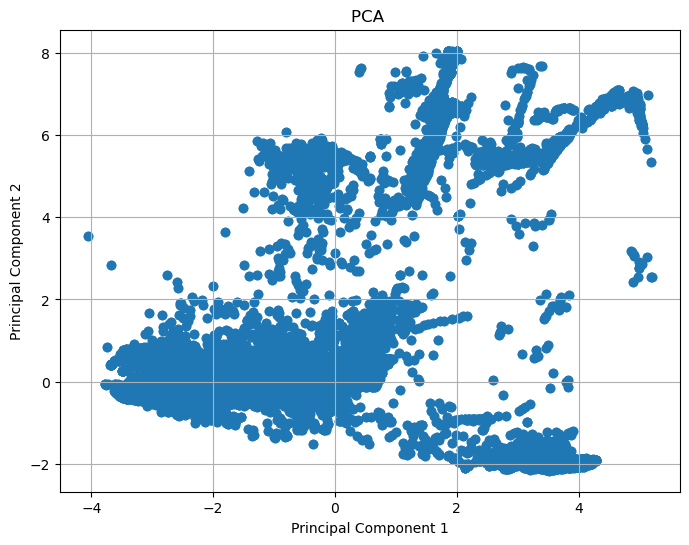

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA ')
plt.grid('True')
plt.show()

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train,y_train)
dt_y_pred=dt_classifier.predict(X_test)
dt_accuracy=accuracy_score(y_test,dt_y_pred)
print("Decision Tree Accuracy:",dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test,dt_y_pred))

In [35]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Assuming y_train and y_test are multi-output arrays

# Get the number of labels (assuming consistent across datapoints)
num_labels = y_train.shape[1]

# Empty list to store accuracy for each label
dt_label_accuracies = []

# Loop through each label
for i in range(num_labels):
    y_true_i = y_test.iloc[:, i]  # Separate labels for each category
    y_pred_i = dt_classifier.predict(X_test)[:, i]
    accuracy_i = accuracy_score(y_true_i, y_pred_i)
    dt_label_accuracies.append(accuracy_i)

    # Print accuracy for this label (optional)
    print(f"Accuracy for Label {i+1}:", accuracy_i)



Accuracy for Label 1: 0.9992061129304356
Accuracy for Label 2: 0.9992061129304356
Accuracy for Label 3: 0.9994045846978268


In [36]:
y_test.iloc[:]


,attack,attack_map,attack_flag
29514,neptune,dos attack,Yes
16109,normal,Safe,NO
44671,neptune,dos attack,Yes
43387,neptune,dos attack,Yes
28148,normal,Safe,NO
...,...,...,...
43552,ipsweep,probe attack,Yes
11032,normal,Safe,NO
31893,neptune,dos attack,Yes
26877,neptune,dos attack,Yes


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# ... (your data preparation code)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Assuming your y_train and y_test are multi-output arrays

# Get the number of labels (assuming consistent across datapoints)
num_labels = y_train.shape[1]

# Empty list to store accuracy for each label
rf_label_accuracies = []

# Loop through each label
for i in range(num_labels):
  y_true_i = y_test.iloc[:, i]  # Separate labels for each category
  y_pred_i = rf_classifier.predict(X_test)[:, i]  # Use trained rf_classifier
  accuracy_i = accuracy_score(y_true_i, y_pred_i)
  rf_label_accuracies.append(accuracy_i)

  # Print accuracy for this label (optional)
  print(f"Accuracy for Label {i+1}:", accuracy_i)

# Print average accuracy if desired (calculate average of label_accuracies list)


Accuracy for Label 1: 0.9994045846978268
Accuracy for Label 2: 0.9998015282326089
Accuracy for Label 3: 0.9998015282326089


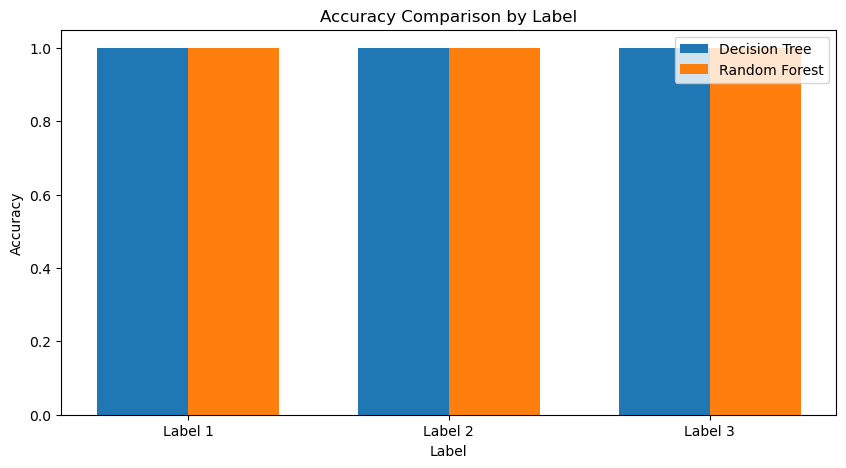

In [38]:
labels = [f"Label {i+1}" for i in range(num_labels)]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, dt_label_accuracies, width, label='Decision Tree')
plt.bar(x + width/2, rf_label_accuracies, width, label='Random Forest')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Label')
plt.xticks(x, labels)
plt.legend()
plt.show()